# Ejercicios de pandas
Notebook con ejemplos prácticos para cada punto.

## 1. Introducción a pandas

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'2.3.3'

## 2. Series y DataFrames

In [2]:
s = pd.Series([10, 20, 30, 10], index=['a','b','c', 'd'])

#print(s.head(1))

#print(s.tail(1))
#print(s.shape)
#print(s.index)
#print(s.info)
#print(s.describe(percentiles=[0.10, 0.60, 0.90]))
print(s)
#print(s.quantile(0.90))




a    10
b    20
c    30
d    10
dtype: int64


In [3]:
df = pd.DataFrame({'pais':['MX','AR','MX'], 'ventas':[100,200,150]})

print(df.head(1))
print(df.tail(1))
print(df.shape)
print(df.index)
print(df.info)
print(df.describe())
print(df.dtypes)


  pais  ventas
0   MX     100
  pais  ventas
2   MX     150
(3, 2)
RangeIndex(start=0, stop=3, step=1)
<bound method DataFrame.info of   pais  ventas
0   MX     100
1   AR     200
2   MX     150>
       ventas
count     3.0
mean    150.0
std      50.0
min     100.0
25%     125.0
50%     150.0
75%     175.0
max     200.0
pais      object
ventas     int64
dtype: object


## 3. Importación y limpieza

In [4]:
url="https://github.com/Twoeme/Prueba2/raw/refs/heads/main/Pandas_Class/layoffs.csv"
df = pd.read_csv(url)
#df = pd.read_excel(url)#sep=";"
print(df)

                         company        location  total_laid_off        date  \
0                         Sonder     SF Bay Area             NaN  11/10/2025   
1                        Axonius   New York City           100.0   11/6/2025   
2                        MyBambu         Memphis           141.0   11/5/2025   
3     Hewlett Packard Enterprise     SF Bay Area            52.0   11/5/2025   
4                         Indeed          Austin             NaN   11/5/2025   
...                          ...             ...             ...         ...   
4197                     Service     Los Angeles             NaN   3/16/2020   
4198                HopSkipDrive     Los Angeles             8.0   3/13/2020   
4199                 Panda Squad     SF Bay Area             6.0   3/13/2020   
4200               Tamara Mellon     Los Angeles            20.0   3/12/2020   
4201                    EasyPost  Salt Lake City            75.0   3/11/2020   

      percentage_laid_off        indust

#Limpieza de datos
•	Valores faltantes

•	Tipos incorrectos

•	Errores de formato

•	Nombres de columnas inconsistentes


In [5]:

print(df['country'].nunique())

#print(len(df['country'].unique()))
#print(df['country'].isna().sum())

66


In [6]:
df['date'].dtype

dtype('O')

In [7]:
df.isna().sum()

company                   0
location                  1
total_laid_off         1459
date                      0
percentage_laid_off    1543
industry                  2
source                    3
stage                     5
funds_raised            475
country                   2
date_added                0
dtype: int64

In [8]:
df['date']= pd.to_datetime(df['date'])
df['date'].dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              4202 non-null   object        
 1   location             4201 non-null   object        
 2   total_laid_off       2743 non-null   float64       
 3   date                 4202 non-null   datetime64[ns]
 4   percentage_laid_off  2659 non-null   float64       
 5   industry             4200 non-null   object        
 6   source               4199 non-null   object        
 7   stage                4197 non-null   object        
 8   funds_raised         3727 non-null   float64       
 9   country              4200 non-null   object        
 10  date_added           4202 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 361.2+ KB


In [9]:
#df.info()

companias = df['company'].unique()
locations = df['location'].unique()
industries = df['industry'].unique()   
countries = df['country'].unique()
date= df['date'].unique()
#total_laidoff = df['total_laid_off'].sum()
#print(f'Total de despidos: {total_laidoff}')
#print(len(companias))

print(df['company'].nunique())
print(df['company'].unique())
print(df['country'].nunique())







2836
['Sonder' 'Axonius' 'MyBambu' ... 'Help.com' 'Panda Squad' 'Tamara Mellon']
66


In [10]:
df['country'].isna().sum()

np.int64(2)

In [11]:
print(len (locations))

267


In [12]:
df['industry'].isna().sum()

np.int64(2)

In [13]:


df.dropna(how='all')
#df.dropna(how='any')
media = df['total_laid_off'].mean()

df['total_laid_off'] = df['total_laid_off'].fillna(media)
df['industry'] = df['industry'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")     

#df.fillna(method="bfill", "ffill")
#Rellenar con un número
#Rellenar con la media de la columna
#Rellenar con el valor anterior (method="ffill")
#Rellenar con el siguiente (method="bfill")
df['total_laid_off'].isna().sum()


np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              4202 non-null   object        
 1   location             4201 non-null   object        
 2   total_laid_off       4202 non-null   float64       
 3   date                 4202 non-null   datetime64[ns]
 4   percentage_laid_off  2659 non-null   float64       
 5   industry             4202 non-null   object        
 6   source               4199 non-null   object        
 7   stage                4197 non-null   object        
 8   funds_raised         3727 non-null   float64       
 9   country              4202 non-null   object        
 10  date_added           4202 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 361.2+ KB


<h1>Reto 4</h1>

In [15]:
df['stage'] = df['stage'].fillna("Unknown")
df['source'] = df['source'].fillna("Unknown")

In [16]:
media2 = df['percentage_laid_off'].mean()
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(media2)
df['funds_raised'] = df['funds_raised'].fillna(0)
df['location'] = df['location'].fillna("Unknown")  

df.isna().sum() 

company                0
location               0
total_laid_off         0
date                   0
percentage_laid_off    0
industry               0
source                 0
stage                  0
funds_raised           0
country                0
date_added             0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.duplicated()
df.drop_duplicates()
#subset=["col1","col2"] → considerar duplicadas solo esas columnas
#keep="first" o keep="last"


,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Sonder,SF Bay Area,287.806781,2025-11-10,1.000000,Travel,https://skift.com/2025/11/10/sonder-shuts-down...,Post-IPO,839.0,United States,11/10/2025
1,Axonius,New York City,100.000000,2025-11-06,0.110000,Security,https://www.calcalistech.com/ctechnews/article...,Series E,865.0,United States,11/7/2025
2,MyBambu,Memphis,141.000000,2025-11-05,1.000000,Finance,https://cbs12.com/news/local/new-west-palm-bea...,Unknown,15.0,United States,11/7/2025
3,Hewlett Packard Enterprise,SF Bay Area,52.000000,2025-11-05,0.294064,Hardware,https://www.sfchronicle.com/tech/article/layof...,Post-IPO,1400.0,United States,11/7/2025
4,Indeed,Austin,287.806781,2025-11-05,0.294064,HR,https://www.businessinsider.com/indeed-layoffs...,Acquired,5.0,United States,11/8/2025
...,...,...,...,...,...,...,...,...,...,...,...
4197,Service,Los Angeles,287.806781,2020-03-16,1.000000,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,5.1,United States,8/31/2020
4198,HopSkipDrive,Los Angeles,8.000000,2020-03-13,0.100000,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,45.0,United States,4/3/2020
4199,Panda Squad,SF Bay Area,6.000000,2020-03-13,0.750000,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,1.0,United States,4/17/2020
4200,Tamara Mellon,Los Angeles,20.000000,2020-03-12,0.400000,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,90.0,United States,3/31/2020


In [19]:
variable = 2
variable += 5
print(variable)

7


In [20]:
df= df.rename(columns={"company":"compania","location":"ubicacion","date":"fecha","percentage_laid_off":"porcentaje_despidos"})
df.rename(columns={"industry":"industria","source":"fuente","stage":"etapa","funds_raised":"fondos_recaudados","country":"sector_economico","date_added":"fecha_agregado"}, inplace=True)
df=df.rename(columns={"total_laid_off":"total_despidos"})
df.info()
 #5   industry             4202 non-null   object        
 #6   source               4199 non-null   object        
 #7   stage                4197 non-null   object        
 #8   funds_raised         3727 non-null   float64       
 #9   country              4202 non-null   object        
 #10  date_added 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   compania             4202 non-null   object        
 1   ubicacion            4202 non-null   object        
 2   total_despidos       4202 non-null   float64       
 3   fecha                4202 non-null   datetime64[ns]
 4   porcentaje_despidos  4202 non-null   float64       
 5   industria            4202 non-null   object        
 6   fuente               4202 non-null   object        
 7   etapa                4202 non-null   object        
 8   fondos_recaudados    4202 non-null   float64       
 9   sector_economico     4202 non-null   object        
 10  fecha_agregado       4202 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 361.2+ KB


In [21]:
df['etapa'].unique()

array(['Post-IPO', 'Series E', 'Unknown', 'Acquired', 'Series F',
       'Series D', 'Series C', 'Series B', 'Series A', 'Private Equity',
       'Seed', 'Subsidiary', 'Series G', 'Series J', 'Series I',
       'Series H'], dtype=object)

In [22]:
#df=df.rename(columns={"pais":"sector_economico"},inplace=True)

In [23]:
df.columns = df.columns.str.lower()


In [24]:
df['ubicacion'] = df['ubicacion'].str.replace(" ", "_") 

In [25]:
df.columns = df.columns.str.replace(" ", "_")

In [26]:
#df["col"] = df["col"].astype(int)
#df["fecha"] = pd.to_datetime(df["fecha"])


In [27]:
#df["etapa"] = df["etapa"].astype("category") #No es buena practica
#df['etapa'].dtypes

# Flujo típico de limpieza
1.	Cargar archivo (CSV, Excel, JSON).

2.	Explorar estructura con .head(), .info(), .describe().

3.	Renombrar columnas.

4.	Tratar valores nulos.

5.	Eliminar duplicados.

6.	Arreglar tipos de datos.

7.	Verificar resultados.


## 4. Selección y filtrado

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   compania             4202 non-null   object        
 1   ubicacion            4202 non-null   object        
 2   total_despidos       4202 non-null   float64       
 3   fecha                4202 non-null   datetime64[ns]
 4   porcentaje_despidos  4202 non-null   float64       
 5   industria            4202 non-null   object        
 6   fuente               4202 non-null   object        
 7   etapa                4202 non-null   object        
 8   fondos_recaudados    4202 non-null   float64       
 9   sector_economico     4202 non-null   object        
 10  fecha_agregado       4202 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 361.2+ KB


In [29]:
companias_NY = df.loc[df['ubicacion'] == 'New_York_City',['compania', 'etapa', 'sector_economico','fondos_recaudados']]
companias_NY.reset_index(drop=True, inplace=True)
#print(companias_NY.sort_values(by='fondos_recaudados', ascending=False).head(10))
#print(companias_NY.head(10) )
companias_NY.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   compania           422 non-null    object 
 1   etapa              422 non-null    object 
 2   sector_economico   422 non-null    object 
 3   fondos_recaudados  422 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.3+ KB


In [30]:
revisar_pais = df.loc[df['ubicacion'] == 'Unknown',['compania', 'etapa', 'sector_economico','fondos_recaudados']]
print(revisar_pais)

          compania     etapa sector_economico  fondos_recaudados
1092  Product Hunt  Acquired    United States                0.0


In [31]:
df[['compania', 'ubicacion']]
#df.loc[:, ["compania","pais"]]    


,compania,ubicacion
0,Sonder,SF_Bay_Area
1,Axonius,New_York_City
2,MyBambu,Memphis
3,Hewlett Packard Enterprise,SF_Bay_Area
4,Indeed,Austin
...,...,...
4197,Service,Los_Angeles
4198,HopSkipDrive,Los_Angeles
4199,Panda Squad,SF_Bay_Area
4200,Tamara Mellon,Los_Angeles


In [32]:
df.iloc[[2,4], 2:5]
#df.iloc[[12, 13, 17], 0:3]

,total_despidos,fecha,porcentaje_despidos
2,141.000000,2025-11-05,1.000000
4,287.806781,2025-11-05,0.294064


In [33]:
#df[df['fecha'] > '2024-01-01']
df[(df['fecha'] > '2024-01-01') & (df['ubicacion'] == 'SF_Bay_Area')]
#df[(df['fecha'] > '2024-01-01') | (df['ubicacion'] == 'SF_Bay_Area')]

,compania,ubicacion,total_despidos,fecha,porcentaje_despidos,industria,fuente,etapa,fondos_recaudados,sector_economico,fecha_agregado
0,Sonder,SF_Bay_Area,287.806781,2025-11-10,1.000000,Travel,https://skift.com/2025/11/10/sonder-shuts-down...,Post-IPO,839.0,United States,11/10/2025
3,Hewlett Packard Enterprise,SF_Bay_Area,52.000000,2025-11-05,0.294064,Hardware,https://www.sfchronicle.com/tech/article/layof...,Post-IPO,1400.0,United States,11/7/2025
9,Chegg,SF_Bay_Area,388.000000,2025-10-27,0.450000,Education,https://www.reuters.com/sustainability/boards-...,Post-IPO,227.0,United States,10/28/2025
13,Applied Material,SF_Bay_Area,1400.000000,2025-10-23,0.040000,Manufacturing,https://www.bloomberg.com/news/articles/2025-1...,Post-IPO,2100.0,United States,10/25/2025
15,Altruist,SF_Bay_Area,50.000000,2025-10-23,0.150000,Finance,https://www.investmentnews.com/ria-news/altrui...,Series E,449.0,United States,10/25/2025
...,...,...,...,...,...,...,...,...,...,...,...
880,Treasure Financial,SF_Bay_Area,14.000000,2024-01-09,0.600000,Finance,https://techcrunch.com/2024/01/09/treasure-fin...,Series A,14.0,United States,1/30/2024
881,Humane,SF_Bay_Area,10.000000,2024-01-09,0.040000,Hardware,https://www.theverge.com/2024/1/9/24032274/hum...,Series C,230.0,United States,1/10/2024
885,Unity,SF_Bay_Area,1800.000000,2024-01-08,0.250000,Other,https://www.reuters.com/technology/unity-softw...,Post-IPO,1300.0,United States,1/8/2024
895,LiveVox,SF_Bay_Area,287.806781,2024-01-07,0.294064,Support,https://www.channelfutures.com/unified-communi...,Acquired,12.0,United States,1/20/2024


In [34]:
df[df['ubicacion'] != 'New_York_City']

,compania,ubicacion,total_despidos,fecha,porcentaje_despidos,industria,fuente,etapa,fondos_recaudados,sector_economico,fecha_agregado
0,Sonder,SF_Bay_Area,287.806781,2025-11-10,1.000000,Travel,https://skift.com/2025/11/10/sonder-shuts-down...,Post-IPO,839.0,United States,11/10/2025
2,MyBambu,Memphis,141.000000,2025-11-05,1.000000,Finance,https://cbs12.com/news/local/new-west-palm-bea...,Unknown,15.0,United States,11/7/2025
3,Hewlett Packard Enterprise,SF_Bay_Area,52.000000,2025-11-05,0.294064,Hardware,https://www.sfchronicle.com/tech/article/layof...,Post-IPO,1400.0,United States,11/7/2025
4,Indeed,Austin,287.806781,2025-11-05,0.294064,HR,https://www.businessinsider.com/indeed-layoffs...,Acquired,5.0,United States,11/8/2025
5,TripAdvisor,Boston,287.806781,2025-11-05,0.200000,Travel,https://skift.com/2025/11/05/layoffs-hit-20-of...,Post-IPO,3.0,United States,11/7/2025
...,...,...,...,...,...,...,...,...,...,...,...
4197,Service,Los_Angeles,287.806781,2020-03-16,1.000000,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,5.1,United States,8/31/2020
4198,HopSkipDrive,Los_Angeles,8.000000,2020-03-13,0.100000,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,45.0,United States,4/3/2020
4199,Panda Squad,SF_Bay_Area,6.000000,2020-03-13,0.750000,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,1.0,United States,4/17/2020
4200,Tamara Mellon,Los_Angeles,20.000000,2020-03-12,0.400000,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,90.0,United States,3/31/2020


In [35]:
df['sector_economico'].nunique()

67

In [36]:
ubicacion_fecha = df.query("ubicacion == 'Norwalk' and fecha > '2024-01-01'")
ciudad = 'Boston'
sector_economico= df.query("sector_economico == 'Travel' or ubicacion == @ciudad")
revision=df.query("sector_economico.isnull()")
print(revision)

Empty DataFrame
Columns: [compania, ubicacion, total_despidos, fecha, porcentaje_despidos, industria, fuente, etapa, fondos_recaudados, sector_economico, fecha_agregado]
Index: []


## 5. Transformación de datos

In [37]:

df['despidos_por_fondo'] = df['total_despidos'] / (df['fondos_recaudados'] + 1)  # Añadimos 1 para evitar división por cero
print(df['despidos_por_fondo'])
df.drop(columns=['despidos_por_fondo'], inplace=True)

0        0.342627
1        0.115473
2        8.812500
3        0.037116
4       47.967797
          ...    
4197    47.181439
4198     0.173913
4199     3.000000
4200     0.219780
4201     5.769231
Name: despidos_por_fondo, Length: 4202, dtype: float64


In [38]:
df_nde = df['total_despidos'].astype(int)
print(df_nde)   

0       287
1       100
2       141
3        52
4       287
       ... 
4197    287
4198      8
4199      6
4200     20
4201     75
Name: total_despidos, Length: 4202, dtype: int64


In [39]:
df['etapa'].nunique()
print(df['etapa'].unique())

['Post-IPO' 'Series E' 'Unknown' 'Acquired' 'Series F' 'Series D'
 'Series C' 'Series B' 'Series A' 'Private Equity' 'Seed' 'Subsidiary'
 'Series G' 'Series J' 'Series I' 'Series H']


In [40]:
df['etapa'].nunique()


16

In [41]:
df.apply(lambda x: x.astype(str).str.upper())
#df['sexo']=df['sexo'].map({"M":"Masculino", "F":"Femenino"})
#print(df['etapa'].head(30))  

,compania,ubicacion,total_despidos,fecha,porcentaje_despidos,industria,fuente,etapa,fondos_recaudados,sector_economico,fecha_agregado
0,SONDER,SF_BAY_AREA,287.8067808968283,2025-11-10,1.0,TRAVEL,HTTPS://SKIFT.COM/2025/11/10/SONDER-SHUTS-DOWN...,POST-IPO,839.0,UNITED STATES,11/10/2025
1,AXONIUS,NEW_YORK_CITY,100.0,2025-11-06,0.11,SECURITY,HTTPS://WWW.CALCALISTECH.COM/CTECHNEWS/ARTICLE...,SERIES E,865.0,UNITED STATES,11/7/2025
2,MYBAMBU,MEMPHIS,141.0,2025-11-05,1.0,FINANCE,HTTPS://CBS12.COM/NEWS/LOCAL/NEW-WEST-PALM-BEA...,UNKNOWN,15.0,UNITED STATES,11/7/2025
3,HEWLETT PACKARD ENTERPRISE,SF_BAY_AREA,52.0,2025-11-05,0.2940644979315532,HARDWARE,HTTPS://WWW.SFCHRONICLE.COM/TECH/ARTICLE/LAYOF...,POST-IPO,1400.0,UNITED STATES,11/7/2025
4,INDEED,AUSTIN,287.8067808968283,2025-11-05,0.2940644979315532,HR,HTTPS://WWW.BUSINESSINSIDER.COM/INDEED-LAYOFFS...,ACQUIRED,5.0,UNITED STATES,11/8/2025
...,...,...,...,...,...,...,...,...,...,...,...
4197,SERVICE,LOS_ANGELES,287.8067808968283,2020-03-16,1.0,TRAVEL,HTTPS://TECHCRUNCH.COM/2020/03/16/TRAVEL-SAVIN...,SEED,5.1,UNITED STATES,8/31/2020
4198,HOPSKIPDRIVE,LOS_ANGELES,8.0,2020-03-13,0.1,TRANSPORTATION,HTTPS://LAYOFFS.FYI/2020/04/02/HOPSKIPDRIVE-LA...,UNKNOWN,45.0,UNITED STATES,4/3/2020
4199,PANDA SQUAD,SF_BAY_AREA,6.0,2020-03-13,0.75,CONSUMER,HTTPS://TWITTER.COM/DANIELSINGER/STATUS/123854...,SEED,1.0,UNITED STATES,4/17/2020
4200,TAMARA MELLON,LOS_ANGELES,20.0,2020-03-12,0.4,RETAIL,HTTPS://LAYOFFS.FYI/LIST/TAMARA-MELLON/,SERIES C,90.0,UNITED STATES,3/31/2020


## 6. Agrupaciones y análisis

In [42]:
df.drop(columns=['fecha'], inplace=True)

In [43]:
df.info()
df['etapa']=df['etapa'].astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compania             4202 non-null   object 
 1   ubicacion            4202 non-null   object 
 2   total_despidos       4202 non-null   float64
 3   porcentaje_despidos  4202 non-null   float64
 4   industria            4202 non-null   object 
 5   fuente               4202 non-null   object 
 6   etapa                4202 non-null   object 
 7   fondos_recaudados    4202 non-null   float64
 8   sector_economico     4202 non-null   object 
 9   fecha_agregado       4202 non-null   object 
dtypes: float64(3), object(7)
memory usage: 328.4+ KB


In [44]:
companias_despidos = pd.DataFrame({
    'compania':df['compania'],
    'total_despidos':df['total_despidos'],
    'porcentaje_despidos':df['porcentaje_despidos'],
    'etapa':df['etapa']
    }) 


In [45]:
companias_despidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compania             4202 non-null   object 
 1   total_despidos       4202 non-null   float64
 2   porcentaje_despidos  4202 non-null   float64
 3   etapa                4202 non-null   object 
dtypes: float64(2), object(2)
memory usage: 131.4+ KB


In [46]:
companias_NY_etapas = companias_NY.groupby('etapa').count()
print(companias_NY_etapas)
companias_despidos['total_despidos']=companias_despidos['total_despidos'].astype(int)
companias_despidos['porcentaje_despidos']=companias_despidos['porcentaje_despidos'].astype(int)
#companias_despidos.groupby('compania').mean()

                compania  sector_economico  fondos_recaudados
etapa                                                        
Acquired              38                38                 38
Post-IPO              89                89                 89
Private Equity         5                 5                  5
Seed                   9                 9                  9
Series A              27                27                 27
Series B              55                55                 55
Series C              35                35                 35
Series D              49                49                 49
Series E              28                28                 28
Series F              18                18                 18
Series G               2                 2                  2
Series H               1                 1                  1
Subsidiary             2                 2                  2
Unknown               64                64                 64


In [47]:
total_despidos_tabla=df.groupby(['etapa','ubicacion']).agg({'total_despidos':['sum','mean', 'max'], 'porcentaje_despidos':['sum','mean','count', 'max']})
#total_despidos_tabla.to_excel('total_despidos_por_etapa_y_ubicacion.xlsx', index=True, sheet_name='Resumen_despidos')
print(total_despidos_tabla)

                             total_despidos                            \
                                        sum         mean          max   
etapa    ubicacion                                                      
Acquired Albany                  371.000000   371.000000   371.000000   
         Amsterdam,_Non-U.S.    7835.000000  1119.285714  4375.000000   
         Ann_Arbor               200.000000   200.000000   200.000000   
         Atlanta                 387.806781   193.903390   287.806781   
         Austin                 5075.613562  1015.122712  2200.000000   
...                                     ...          ...          ...   
Unknown  Vilnius,_Non-U.S.       287.806781   287.806781   287.806781   
         Washington_D.C.         494.806781   123.701695   287.806781   
         Xi'an,_Non-U.S.         287.806781   287.806781   287.806781   
         Yangon,_Non-U.S.        200.000000   200.000000   200.000000   
         Zurich,_Non-U.S.        287.806781   287.8

In [48]:
companias_NY=companias_NY.drop_duplicates()
companias_NY.to_excel('companias_NY.xlsx', index=True, sheet_name='Companias_NY')

In [49]:
df.groupby(['etapa','ubicacion'])['total_despidos'].sum()

etapa     ubicacion          
Acquired  Albany                  371.000000
          Amsterdam,_Non-U.S.    7835.000000
          Ann_Arbor               200.000000
          Atlanta                 387.806781
          Austin                 5075.613562
                                    ...     
Unknown   Vilnius,_Non-U.S.       287.806781
          Washington_D.C.         494.806781
          Xi'an,_Non-U.S.         287.806781
          Yangon,_Non-U.S.        200.000000
          Zurich,_Non-U.S.        287.806781
Name: total_despidos, Length: 813, dtype: float64

## 7. Unión y combinación

In [50]:
pd.pivot_table(df, index='etapa', columns='ubicacion', values='total_despidos', aggfunc='sum', fill_value=0)    

ubicacion,"Abuja,_Non-U.S.","Accra,_Non-U.S.","Ahmedabad,_Non-U.S.",Alamosa,Albany,"Amsterdam,_Non-U.S.",Ann_Arbor,"Athens,_Non-U.S.",Atlanta,Auckland,...,"Waterloo,_Non-U.S.","Wellington,_Non-U.S.",Wilmington,"Winnipeg,_Non-U.S.","Wrocław,_Non-U.S.","Xi'an,_Non-U.S.","Yangon,_Non-U.S.","Yavne,_Non-U.S.","Zug,_Non-U.S.","Zurich,_Non-U.S."
etapa,,,,,,,,,,,,,,,,,,,,,
Acquired,0.000000,0.000000,0.0,0.000000,371.0,7835.000000,200.000000,0.000000,387.806781,0.0,...,287.806781,0.000000,0.000000,1150.0,0.0,0.000000,0.0,100.0,0.000000,0.000000
Post-IPO,0.000000,0.000000,0.0,0.000000,0.0,11702.806781,0.000000,0.000000,878.806781,45.0,...,3375.613562,800.000000,387.806781,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
Private Equity,0.000000,0.000000,0.0,287.806781,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,393.806781
Seed,287.806781,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,22.000000,0.000000,0.000000,0.0,120.0,0.000000,0.0,0.0,0.000000,0.000000
Series A,0.000000,0.000000,0.0,0.000000,0.0,35.000000,0.000000,0.000000,90.000000,0.0,...,0.000000,0.000000,287.806781,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
Series B,0.000000,0.000000,0.0,0.000000,0.0,0.000000,40.000000,287.806781,578.806781,0.0,...,13.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,575.613562,62.000000
Series C,0.000000,0.000000,0.0,0.000000,0.0,1073.420343,100.000000,0.000000,1525.613562,0.0,...,0.000000,287.806781,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
Series D,0.000000,150.000000,0.0,0.000000,0.0,0.000000,287.806781,0.000000,218.000000,0.0,...,377.806781,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
Series E,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,287.806781,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [51]:
Companias_SF = df.loc[df['ubicacion'] == 'SF_Bay_Area',['compania', 'etapa', 'sector_economico','fondos_recaudados']]
Companias_SF.drop_duplicates(inplace=True)
Companias_SF.to_excel('companias_SF.xlsx', index=False, sheet_name='Companias_SF')

In [52]:
comNY='https://github.com/Twoeme/Prueba2/raw/refs/heads/main/Pandas_Class/companias_NY.xlsx'
companias_NY = pd.read_excel(comNY, sheet_name='Companias_NY')
companias_NY.drop('Unnamed: 0', axis=1, inplace=True)


In [53]:
comSF='https://github.com/Twoeme/Prueba2/raw/refs/heads/main/Pandas_Class/companias_SF.xlsx'
companias_SF = pd.read_excel(comSF, sheet_name='Companias_SF')

In [54]:
dfNYSF = pd.merge(companias_NY, companias_SF, on='compania', how='outer', suffixes=('_NY', '_SF'))
print(dfNYSF)

              compania  etapa_NY sector_economico_NY  fondos_recaudados_NY  \
0      Included Health       NaN                 NaN                   NaN   
1         10X Genomics       NaN                 NaN                   NaN   
2              1stdibs  Series D       United States                 253.0   
3              23andMe       NaN                 NaN                   NaN   
4               6sense       NaN                 NaN                   NaN   
...                ...       ...                 ...                   ...   
1028              dYdX       NaN                 NaN                   NaN   
1029              eBay       NaN                 NaN                   NaN   
1030           inDrive       NaN                 NaN                   NaN   
1031             tZero  Acquired       United States                 472.0   
1032               xAI       NaN                 NaN                   NaN   

      etapa_SF sector_economico_SF  fondos_recaudados_SF  
0   

In [55]:
dfNYSF2 = pd.concat([companias_SF, companias_NY], axis=0, ignore_index=True)
with pd.ExcelWriter('companias_NY_SF_concatenadas.xlsx', engine='openpyxl') as writer:
    dfNYSF2.to_excel(writer, index=False, sheet_name='Companias_NY_SF')    
    dfNYSF.to_excel(writer, index=False, sheet_name='Companias_NY_SF_Merge')

print(dfNYSF2)

                        compania     etapa sector_economico  fondos_recaudados
0                         Sonder  Post-IPO    United States              839.0
1     Hewlett Packard Enterprise  Post-IPO    United States             1400.0
2                          Chegg  Post-IPO    United States              227.0
3               Applied Material  Post-IPO    United States             2100.0
4                       Altruist  Series E    United States              449.0
...                          ...       ...              ...                ...
1030                     Compass  Series G    United States             1600.0
1031                     Convene  Series D    United States              280.0
1032                 Eight Sleep  Series C    United States               70.0
1033             Flywheel Sports  Acquired    United States              120.0
1034                       Popin   Unknown    United States               13.0

[1035 rows x 4 columns]


In [56]:
df1 = pd.DataFrame({'companias':['Mattel','Servientrega','DollarCity'], 'Ventas':[10,20,40]})
df2 = pd.DataFrame({'companias':["Mattel","DollarCity"], 'Ventas':[100,300]})


df3 = pd.merge(df1, df2, on='companias', how='right')
#df3 = df3.fillna(100)
#df3['Ventas_y'][2] = 200
print(df3)


    companias  Ventas_x  Ventas_y
0      Mattel        10       100
1  DollarCity        40       300


In [57]:
df3 = df1+df2
print(df3)

                companias  Ventas
0            MattelMattel   110.0
1  ServientregaDollarCity   320.0
2                     NaN     NaN


Codigo para revisar outliers

In [58]:
Q1= df['total_despidos'].quantile(0.25)
Q3= df['total_despidos'].quantile(0.75)
IQR= Q3 - Q1    
print(IQR)
limite_inferior= Q1 - 1.5 * IQR
limite_superior= Q3 + 1.5 * IQR
outliers = df[(df['total_despidos'] < limite_inferior) | (df['total_despidos'] > limite_superior)]
print(outliers)


227.8067808968283
                compania        ubicacion  total_despidos  \
8                 Amazon          Seattle         14000.0   
13      Applied Material      SF_Bay_Area          1400.0   
53            Salesforce      SF_Bay_Area          4000.0   
98                 Intel       Sacramento          5000.0   
100   Indeed + Glassdoor           Austin          1300.0   
...                  ...              ...             ...   
3930             Groupon          Chicago          2800.0   
3944                Yelp      SF_Bay_Area          1000.0   
3979               Toast           Boston          1300.0   
4033            MindBody  San_Luis_Obispo           700.0   
4181     Flywheel Sports    New_York_City           784.0   

      porcentaje_despidos      industria  \
8                0.010000         Retail   
13               0.040000  Manufacturing   
53               0.294064          Sales   
98               0.294064       Hardware   
100              0.294064    

In [59]:
# Función para detectar outliers usando el método del IQR
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    df[f'{columna}_outlier'] = (df[columna] < limite_inf) | (df[columna] > limite_sup)
    return df, Q1, Q3, IQR, limite_inf, limite_sup

df_limpio, Q1, Q3, IQR, inf, sup = detectar_outliers(df, 'fondos_recaudados')

In [60]:
df_limpio[df_limpio['fondos_recaudados_outlier']]

,compania,ubicacion,total_despidos,porcentaje_despidos,industria,fuente,etapa,fondos_recaudados,sector_economico,fecha_agregado,fondos_recaudados_outlier
3,Hewlett Packard Enterprise,SF_Bay_Area,52.0,0.294064,Hardware,https://www.sfchronicle.com/tech/article/layof...,Post-IPO,1400.0,United States,11/7/2025,True
8,Amazon,Seattle,14000.0,0.010000,Retail,https://www.cnbc.com/2025/10/28/amazon-layoffs...,Post-IPO,8100.0,United States,10/28/2025,True
13,Applied Material,SF_Bay_Area,1400.0,0.040000,Manufacturing,https://www.bloomberg.com/news/articles/2025-1...,Post-IPO,2100.0,United States,10/25/2025,True
14,Rivian,Los_Angeles,600.0,0.040000,Transportation,https://www.reuters.com/business/autos-transpo...,Post-IPO,10700.0,United States,10/25/2025,True
16,Meta,SF_Bay_Area,600.0,0.294064,Consumer,https://www.cnbc.com/2025/10/22/meta-layoffs-a...,Post-IPO,26000.0,United States,10/22/2025,True
...,...,...,...,...,...,...,...,...,...,...,...
3930,Groupon,Chicago,2800.0,0.440000,Retail,https://layoffs.fyi/2020/04/17/groupon-laid-of...,Post-IPO,1400.0,United States,4/13/2020,True
4034,Katerra,SF_Bay_Area,240.0,0.030000,Construction,https://www.constructiondive.com/news/katerra-...,Series D,1200.0,United States,4/4/2020,True
4114,WeWork,New_York_City,250.0,0.294064,Real Estate,https://www.reuters.com/article/wework-layoffs...,Series H,2250.0,United States,3/29/2020,True
4116,OneWeb,"London,_Non-U.S.",451.0,0.850000,Aerospace,https://spacenews.com/oneweb-files-for-chapter...,Unknown,3000.0,United Kingdom,3/28/2020,True


In [61]:
dfprueba1 = pd.DataFrame({'datos':[10, 12, 14, 15, 18, 19, 20, 22, 23, 1000]})
dfprueba2 = pd.DataFrame({'datos':[11, 13, 14, 16, 18, 21, 20, 23, 24, 999]})

d12=pd.concat([dfprueba1, dfprueba2], ignore_index=True, axis=1)
print(d12)

      0    1
0    10   11
1    12   13
2    14   14
3    15   16
4    18   18
5    19   21
6    20   20
7    22   23
8    23   24
9  1000  999


## 8. Visualización básica (conceptual)

Los siguientes comandos funcionarían si matplotlib estuviera configurado:
```
df['A'].plot()
```

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compania                   4202 non-null   object 
 1   ubicacion                  4202 non-null   object 
 2   total_despidos             4202 non-null   float64
 3   porcentaje_despidos        4202 non-null   float64
 4   industria                  4202 non-null   object 
 5   fuente                     4202 non-null   object 
 6   etapa                      4202 non-null   object 
 7   fondos_recaudados          4202 non-null   float64
 8   sector_economico           4202 non-null   object 
 9   fecha_agregado             4202 non-null   object 
 10  fondos_recaudados_outlier  4202 non-null   bool   
dtypes: bool(1), float64(3), object(7)
memory usage: 332.5+ KB


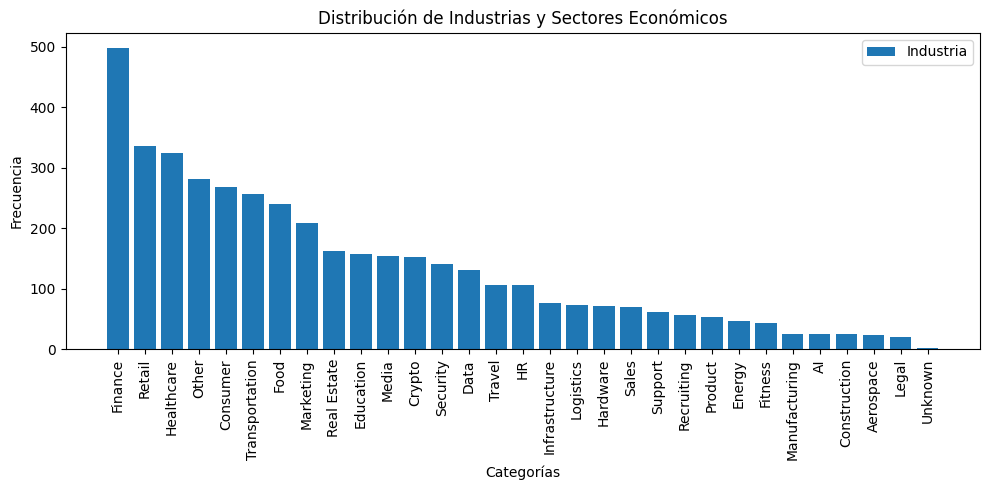

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(df['industria'].value_counts().index, df['industria'].value_counts().values, label='Industria')     
#plt.bar(df['sector_economico'].value_counts().index, df['sector_economico'].value_counts().values, label='Sector Económico')
plt.legend()

plt.title('Distribución de Industrias y Sectores Económicos')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

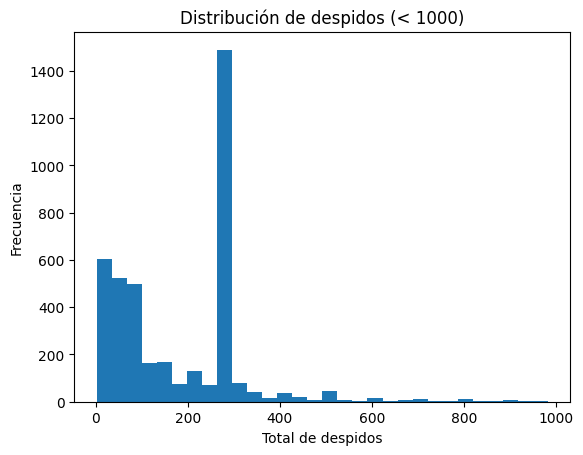

In [64]:
df[df["total_despidos"] < 1000]["total_despidos"].plot(kind="hist", bins=30)
plt.title("Distribución de despidos (< 1000)")
plt.xlabel("Total de despidos")
plt.ylabel("Frecuencia")
plt.show()

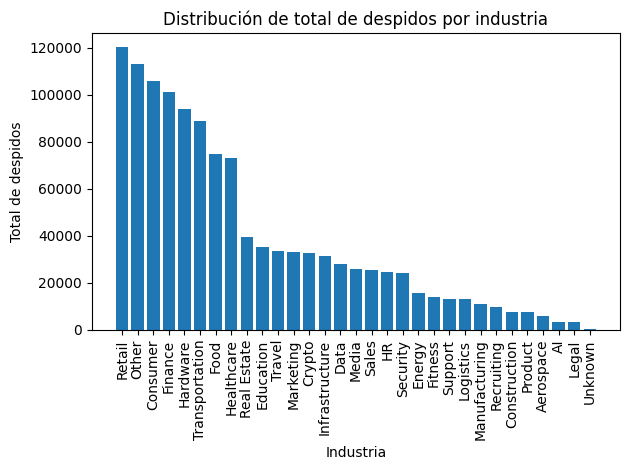

In [65]:
Despidos_por_industria = df.groupby('industria')['total_despidos'].sum().sort_values(ascending=False)
plt.bar(Despidos_por_industria.index, Despidos_por_industria.values)
plt.title("Distribución de total de despidos por industria")
plt.xlabel("Industria")
plt.ylabel("Total de despidos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

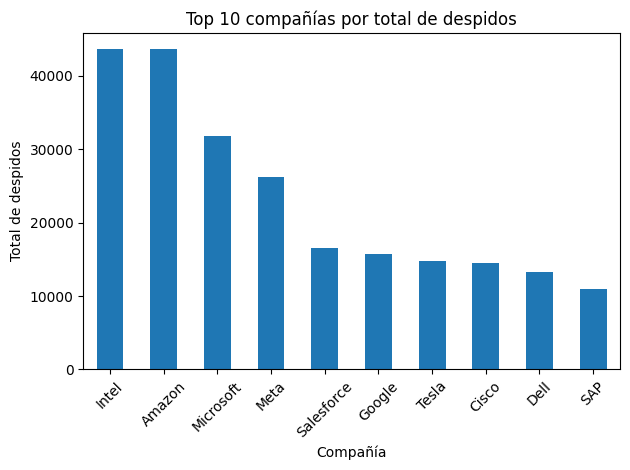

In [66]:
top_companias = (
    df.groupby("compania")["total_despidos"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_companias.plot(kind="bar")
plt.title("Top 10 compañías por total de despidos")
plt.xlabel("Compañía")
plt.ylabel("Total de despidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

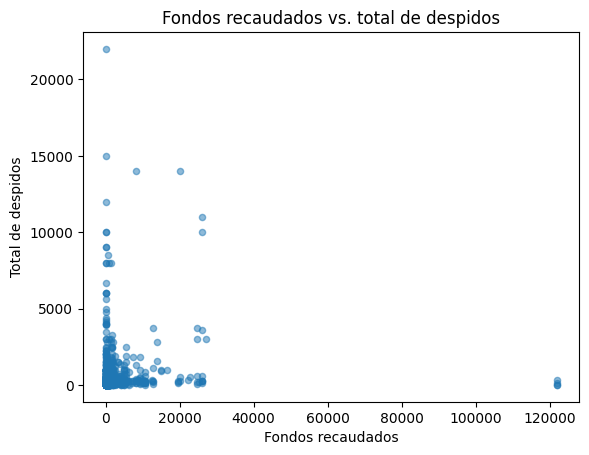

In [67]:

df.plot(
    kind="scatter",
    x="fondos_recaudados",
    y="total_despidos",
    alpha=0.5
)
plt.title("Fondos recaudados vs. total de despidos")
plt.xlabel("Fondos recaudados")
plt.ylabel("Total de despidos")
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compania                   4202 non-null   object 
 1   ubicacion                  4202 non-null   object 
 2   total_despidos             4202 non-null   float64
 3   porcentaje_despidos        4202 non-null   float64
 4   industria                  4202 non-null   object 
 5   fuente                     4202 non-null   object 
 6   etapa                      4202 non-null   object 
 7   fondos_recaudados          4202 non-null   float64
 8   sector_economico           4202 non-null   object 
 9   fecha_agregado             4202 non-null   object 
 10  fondos_recaudados_outlier  4202 non-null   bool   
dtypes: bool(1), float64(3), object(7)
memory usage: 332.5+ KB


In [69]:
df.rename(columns={"sector_economico":"pais"}, inplace=True)

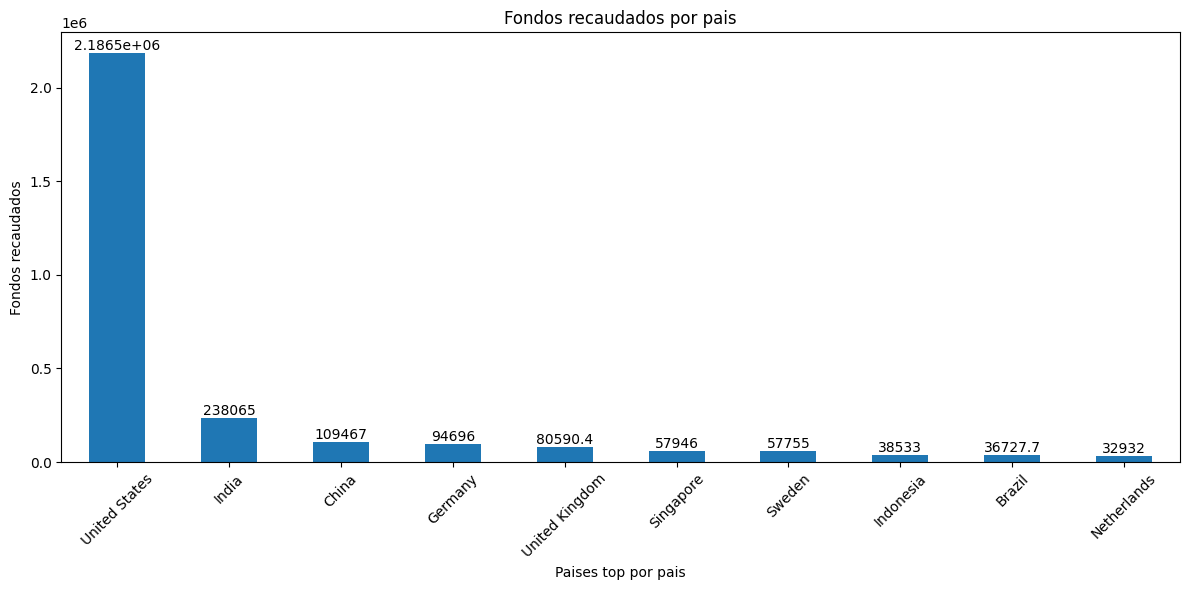

In [70]:
top_industrias_fondos = (
    df.groupby("pais")["fondos_recaudados"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
ax= top_industrias_fondos.plot(kind="bar", figsize=(12,6))
ax.set_xlabel("Paises top por pais")
ax.set_ylabel("Fondos recaudados")
ax.set_title("Fondos recaudados por pais")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

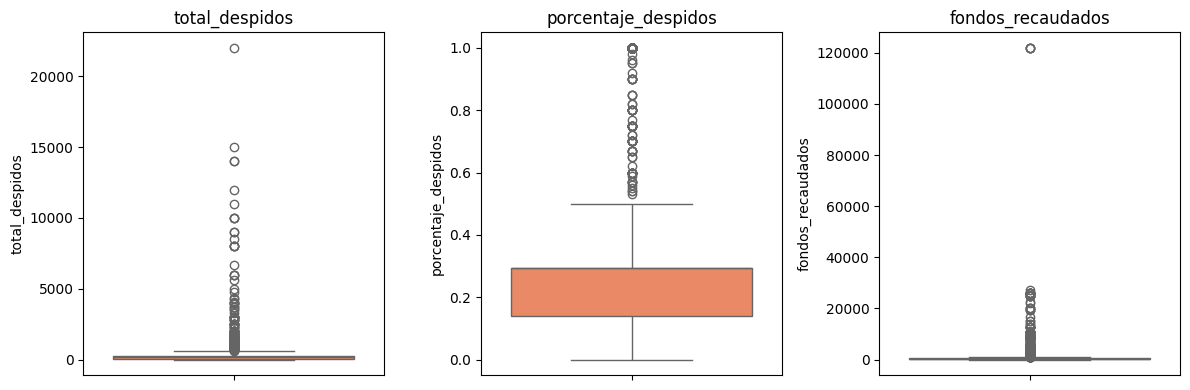

In [71]:
import seaborn as sns

# Seleccionar solo columnas numéricas
vbles_numericas = df.select_dtypes(include='number').columns
cant_vbles = len(vbles_numericas)

plt.figure(figsize=(4 * cant_vbles, 4))  # ancho proporcional al # de variables

for i, col in enumerate(vbles_numericas, 1):
    plt.subplot(1, cant_vbles, i)
    sns.boxplot(y=df[col], color='coral')
    plt.title(col)

plt.tight_layout()
plt.show()

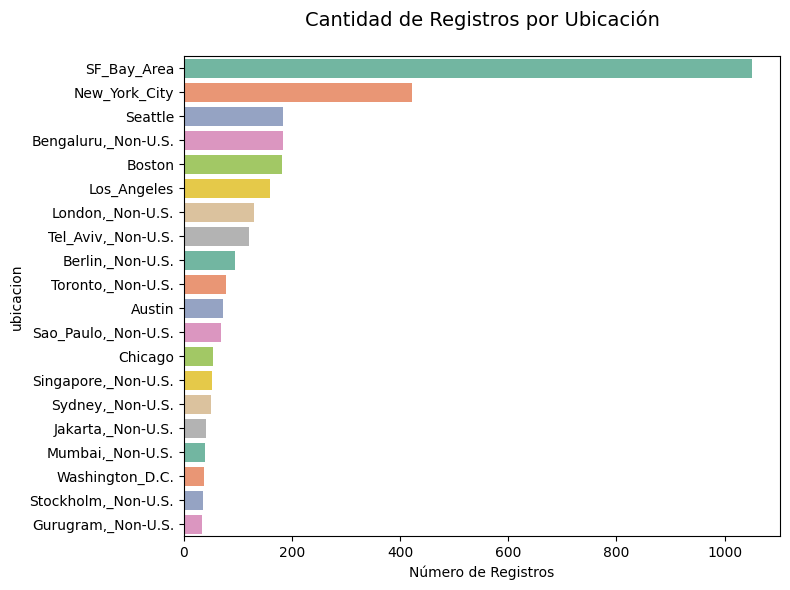

In [72]:
ubicacion_cuenta= df['ubicacion'].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=ubicacion_cuenta.values,
            y=ubicacion_cuenta.index,
            hue=ubicacion_cuenta.index,
            palette='Set2')
plt.title('Cantidad de Registros por Ubicación\n', fontsize=14)
plt.xlabel('Número de Registros')

plt.tight_layout()
plt.show()

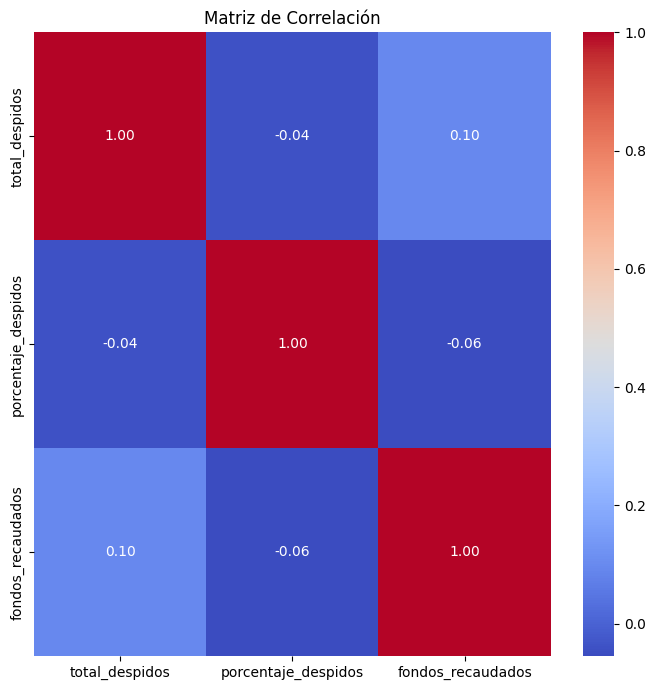

In [73]:
matriz_corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(7,7))

sns.heatmap(matriz_corr,
            annot=True,
            fmt='.2f',
            cmap='coolwarm'
            )
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()